<a href="https://colab.research.google.com/github/Srivatsha108/DMDW/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
#  Dissimilarity matrix generation for binary,nominal,ordinal and numerical attributes.
# It's used to find distance between i'th and j'th object.
# Distance for diagonal elements is 0.
# proximity measure for nominal attribute:
     #d(i,j)=(p-m)/p, where p=total attributes, m=matching attributes.
# proximity measure for binary attribute:
     #1. Asymmetric binary attribute:
           #->(b+c)/a+b+c
     #2. Symmetric binary attribute.
           #->(b+c)/a+b+c+d   
     #where a=(1,1) b=(1,0) c=(0,1) d=(0,0)
# proximity measure for ordinal attribute:
                 #zif=(rif-1)/(Mf-1)
# Proximity measure for numerical attribute:
         #d(i,j)=mod(xif-xjf)/(max(i)-min(j)))                  

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
df=pd.read_csv(url,sep=',')


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#proximity measures of binary attribute

In [ ]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]

In [ ]:
dfs.head(10)

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no
5,no,yes,yes,yes,yes,yes,yes,no
6,no,no,no,no,yes,yes,yes,no
7,yes,yes,no,no,yes,yes,no,no
8,no,yes,yes,no,yes,yes,yes,no
9,no,yes,yes,yes,yes,yes,yes,no


In [ ]:
dfs=dfs.replace('no',0)
dfs=dfs.replace('yes',1)

In [ ]:
dfs.head(5)

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [ ]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [ ]:
m=np.array(dfs[['internet','romantic']])
m.reshape(-1,2)
m.shape

(395, 2)

#euclidean matrix value


In [ ]:
from scipy.spatial import distance 

In [ ]:
#cdist(xa,xb,metric='ecluidean',*args,**kwargs)
dist_matrix=distance.cdist(m,n)
print(dist_matrix)

[[1.         1.         1.         ... 0.         0.         0.        ]
 [0.         1.41421356 0.         ... 1.         1.         1.        ]
 [0.         1.41421356 0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         0.         0.        ]
 [0.         1.41421356 0.         ... 1.         1.         1.        ]
 [0.         1.41421356 0.         ... 1.         1.         1.        ]]


In [ ]:
dist_matrix.shape

(395, 395)

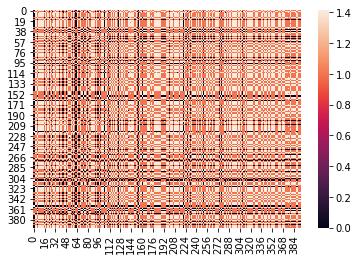

In [ ]:
sns.heatmap(dist_matrix)
plt.show()

#proximity measures of numeric attribute

In [ ]:
numeric=df[['age','Medu','Fedu','traveltime','studytime','failures']]
numeric.head()


,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [ ]:
num1=np.array(numeric[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [ ]:
num2=np.array(numeric[['Medu','Fedu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [ ]:
dist_matrix1=distance.cdist(num1,num2)
print(dist_matrix1)

[[14.56021978 17.02938637 17.02938637 ... 17.02938637 15.13274595
  17.02938637]
 [13.60147051 16.03121954 16.03121954 ... 16.03121954 14.14213562
  16.03121954]
 [11.04536102 14.14213562 14.14213562 ... 14.14213562 12.04159458
  14.14213562]
 ...
 [17.02938637 20.09975124 20.09975124 ... 20.09975124 18.02775638
  20.09975124]
 [14.56021978 17.02938637 17.02938637 ... 17.02938637 15.13274595
  17.02938637]
 [15.5241747  18.02775638 18.02775638 ... 18.02775638 16.1245155
  18.02775638]]


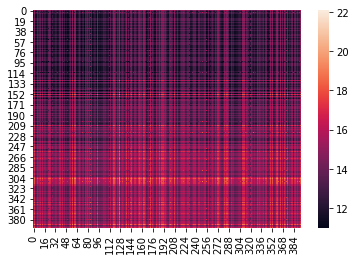

In [ ]:
sns.heatmap(dist_matrix1)
plt.show()

#homework assignment-Student Performance Dataset

In [58]:

from google.colab import files 
uploaded=files.upload()

Saving student-por.csv to student-por (2).csv


In [62]:
import io
df3 = pd.read_csv(io.BytesIO(uploaded['student-por.csv']))

In [63]:
df3.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [66]:
print(set(df3['address']))
print(set(df3['school']))
print(set(df3['sex']))
print(set(df3['famsize']))
print(set(df3['Pstatus']))

{'U', 'R'}
{'MS', 'GP'}
{'M', 'F'}
{'LE3', 'GT3'}
{'T', 'A'}
{'other', 'mother', 'father'}


#proximity measures for binary attributes

In [67]:

df2=df3[['address','school','sex','famsize','Pstatus']]
df2.shape

(649, 5)

In [69]:
df2.head()

,address,school,sex,famsize,Pstatus
0,U,GP,F,GT3,A
1,U,GP,F,GT3,T
2,U,GP,F,LE3,T
3,U,GP,F,GT3,T
4,U,GP,F,GT3,T


In [72]:
df2=df2.replace('U',1)
df2=df2.replace('R',0)
df2=df2.replace('GP',1)
df2=df2.replace('MS',0)
df2=df2.replace('M',1)
df2=df2.replace('F',0)
df2=df2.replace('GT3',1)
df2=df2.replace('LE3',0)
df2=df2.replace('T',1)
df2=df2.replace('A',0)
df2.head()

,address,school,sex,famsize,Pstatus
0,1,1,0,1,0
1,1,1,0,1,1
2,1,1,0,0,1
3,1,1,0,1,1
4,1,1,0,1,1


In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
m2=np.array(df2[['address','school']])
m2.reshape(-1,2)
m2.shape

(649, 2)

In [78]:
n2=np.array(df2[['sex','famsize']])
n2.reshape(-1,2)
n2.shape

(649, 2)

In [79]:
from scipy.spatial import distance

In [85]:
dist_matrix2=distance.cdist(m2,n2)
print(dist_matrix2)


[[1.         1.         1.41421356 ... 1.         1.         1.        ]
 [1.         1.         1.41421356 ... 1.         1.         1.        ]
 [1.         1.         1.41421356 ... 1.         1.         1.        ]
 ...
 [1.41421356 1.41421356 1.         ... 1.41421356 0.         0.        ]
 [1.41421356 1.41421356 1.         ... 1.41421356 0.         0.        ]
 [1.         1.         0.         ... 1.         1.         1.        ]]


In [81]:
dist_matrix2.shape

(649, 649)

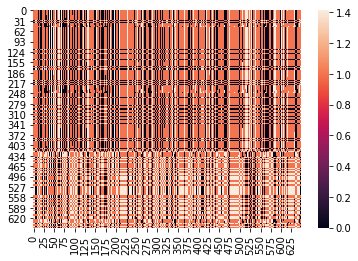

In [82]:
sns.heatmap(dist_matrix2)
plt.show()

# Proximity measures for numerical attributes

In [91]:
df4=df3[['age','Medu','Fedu']]
df4.head()

,age,Medu,Fedu
0,18,4,4
1,17,1,1
2,15,1,1
3,15,4,2
4,16,3,3


In [97]:
m3=np.array(df4[['age','Medu']])
n3=np.array(df4[['Medu','Fedu']])
m3.reshape(-1,2)
n3.reshape(-1,2)
print(m3.shape)
n3.shape

(649, 2)


(649, 2)

In [99]:
dist_matrix3=distance.cdist(m3,n3)
print(dist_matrix3)

[[14.         17.2626765  17.2626765  ... 17.2626765  15.29705854
  15.13274595]
 [13.34166406 16.         16.         ... 16.         14.
  14.03566885]
 [11.40175425 14.         14.         ... 14.         12.
  12.04159458]
 ...
 [14.31782106 17.         17.         ... 17.         15.
  15.03329638]
 [13.03840481 16.1245155  16.1245155  ... 16.1245155  14.14213562
  14.03566885]
 [14.03566885 17.11724277 17.11724277 ... 17.11724277 15.13274595
  15.03329638]]


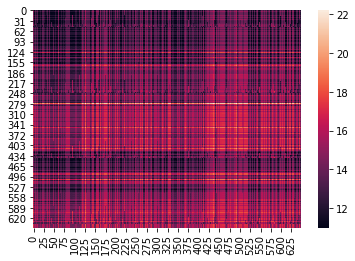

In [101]:
sns.heatmap(dist_matrix3)
plt.show()